# Data exploration and cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data

pd.set_option('display.max_columns', None)

jfk = pd.read_csv('/content/JFK_flight_data.csv')

In [ ]:
jfk.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   
3     11             1            5                B6   N999JQ  MCO   
4     11             1            5                DL   N880DN  ATL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  \
0         -1               124       636        324         323        448   
1         -7               371      2475        340         333        531   
2         40               181      1069        301         341        482   
3         -2               168       944        345         343        513   
4         -4               139       760        360         356        499   

   Temperature Dew Point  Humidity Wind  Wind Speed  Wind Gust  Pressure  \
0           48        34        58    W          25         38     29.86   
1           48        34        58    W          25         38     29.86   
2           48        34        58    W          25         38     29.86   
3           48        34        58    W          25         38     29.86   
4           46        32        58    W          24         35     29.91   

      Condition  sch_dep  sch_arr  TAXI_OUT  
0  Fair / Windy        9       17        14  
1  Fair / Windy        9       17        15  
2  Fair / Windy        9       17        22  
3  Fair / Windy        9       17        12  
4  Fair / Windy        9       17        13

In [ ]:
jfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [ ]:
# There are only two entries with null values, so we drop them.
# However, note that we could have replaced the null values using the 
# linear method, replacing with 0, the column's average,
# etc. (imputation)

jfk = jfk.dropna()

In [ ]:
jfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   TAIL_NUM           28818 non-null  object 
 5   DEST               28818 non-null  object 
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  object 
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [ ]:
jfk.describe()

MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY  \
count  28818.000000  28818.000000  28818.000000  28818.000000   
mean       7.893955     16.020890      4.008953      6.373239   
std        4.991779      8.750448      1.985299     38.735195   
min        1.000000      1.000000      1.000000    -22.000000   
25%        1.000000      8.000000      2.000000     -6.000000   
50%       11.000000     16.000000      4.000000     -3.000000   
75%       12.000000     24.000000      6.000000      2.000000   
max       12.000000     31.000000      7.000000   1276.000000   

       CRS_ELAPSED_TIME      DISTANCE     CRS_DEP_M    DEP_TIME_M  \
count      28818.000000  28818.000000  28818.000000  28818.000000   
mean         225.294399   1267.787494    830.970470    828.898987   
std          119.483432    889.354031    299.381938    305.844666   
min           57.000000     94.000000    301.000000      1.000000   
25%          124.000000    483.000000    545.000000    542.000000   
50%          188.000000   1029.000000    856.000000    854.000000   
75%          365.000000   2248.000000   1095.000000   1097.000000   
max          697.000000   4983.000000   1439.000000   1440.000000   

          CRS_ARR_M   Temperature      Humidity    Wind Speed     Wind Gust  \
count  28818.000000  28818.000000  28818.000000  28818.000000  28818.000000   
mean     910.886980     41.491047     57.732806     12.368485      5.535707   
std      345.370574      8.042493     23.469480      6.258667     11.886780   
min        1.000000     17.000000      0.000000      0.000000      0.000000   
25%      667.000000     36.000000     46.000000      8.000000      0.000000   
50%      918.000000     42.000000     59.000000     12.000000      0.000000   
75%     1192.750000     47.000000     74.000000     16.000000      0.000000   
max     1439.000000     68.000000     97.000000     36.000000     49.000000   

           Pressure       sch_dep       sch_arr      TAXI_OUT  
count  28818.000000  28818.000000  28818.000000  28818.000000  
mean      30.092410     31.091956     28.431813     20.857207  
std        0.296158      9.510317      8.263242      6.850197  
min       29.200000      0.000000      0.000000      5.000000  
25%       29.880000     26.000000     21.000000     16.000000  
50%       30.110000     30.000000     30.000000     19.000000  
75%       30.320000     37.000000     35.000000     25.000000  
max       30.750000     55.000000     46.000000     41.000000

In [ ]:
# Unique values for categorical variables.

print(jfk['OP_UNIQUE_CARRIER'].unique())
print(jfk['OP_UNIQUE_CARRIER'].value_counts())
print(jfk['DEST'].unique())
print(jfk['TAIL_NUM'].unique())
print(len(jfk['TAIL_NUM'].unique()))
print(jfk['Wind'].unique())
print(jfk['Condition'].unique())
jfk['MONTH'].unique()


['B6' 'DL' 'AA' 'AS' 'MQ' '9E' 'YX' 'HA' 'OO']
B6    9588
DL    7680
9E    4484
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: OP_UNIQUE_CARRIER, dtype: int64
['CHS' 'LAX' 'FLL' 'MCO' 'ATL' 'ORD' 'BUF' 'LGB' 'LAS' 'DCA' 'PHX' 'SFO'
 'SJU' 'SLC' 'BOS' 'SAV' 'SYR' 'MSP' 'SEA' 'MIA' 'PDX' 'TPA' 'BTV' 'IAH'
 'DEN' 'RSW' 'ORF' 'JAX' 'MSY' 'CLT' 'BNA' 'RDU' 'SAN' 'SJC' 'ROC' 'DFW'
 'IAD' 'AUS' 'DTW' 'PWM' 'SRQ' 'CMH' 'HNL' 'PBI' 'BWI' 'CLE' 'BUR' 'PIT'
 'RIC' 'IND' 'CVG' 'SMF' 'ONT' 'SAT' 'PSP' 'OAK' 'ABQ' 'PSE' 'ORH' 'BQN'
 'STT' 'RNO' 'PHL' 'EGE' 'JAC']
['N828JB' 'N992JB' 'N959JB' ... 'N316NB' 'N976NN' 'N217JQ']
2092
['W' 'WNW' 'NW' 'NNW' 'S' 'ENE' 'NE' 'NNE' 'E' 'SE' 'CALM' 'SW' 'VAR'
 'SSE' 'SSW' 'WSW' 'N' 'ESE']
['Fair / Windy' 'Fair' 'Light Rain / Windy' 'Partly Cloudy'
 'Mostly Cloudy' 'Cloudy' 'Light Rain' 'Mostly Cloudy / Windy'
 'Partly Cloudy / Windy' 'Light Snow / Windy' 'Cloudy / Windy'
 'Light Drizzle' 'Rain' 'Heavy Rain' 'Fog' 'Wintry Mix'
 'Light Free

array([11, 12,  1])

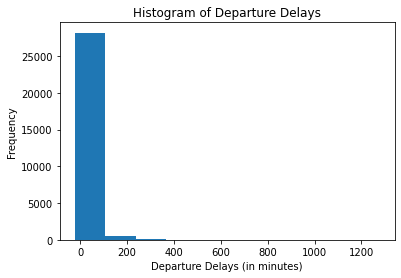

In [ ]:
# Histogram of departure delays.

plt.hist(jfk['DEP_DELAY'])

plt.xlabel('Departure Delays (in minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delays')

plt.show()

In [ ]:
# Viewing entries where delay is greater than 400 minutes.

jfk.loc[jfk['DEP_DELAY']>400]

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
3508      11            11            1                OO   N269SY  BUF   
3543      11            11            1                B6   N618JB  ORD   
3591      11            11            1                9E   N8877A  ORF   
4267      11            13            3                DL   N356NW  SAT   
4584      11            14            4                9E   N8837B  BWI   
5862      11            18            1                AS   N292AK  SEA   
7918      11            24            7                YX   N119HQ  CMH   
10206     12             2            1                OO   N286SY  ORD   
10214     12             2            1                DL   N351NW  SAT   
10229     12             2            1                DL   N709TW  SFO   
12792     12            11            3                9E   N928XJ  ORF   
13510     12            13            5                AA   N786AN  MIA   
13718     12            14            6                9E   N919XJ  JAX   
14633     12            17            2                AS   N284AK  SFO   
14687     12            17            2                B6   N203JB  BUF   
14697     12            17            2                9E   N329PQ  BOS   
14699     12            17            2                B6   N281JB  BOS   
14925     12            18            3                B6   N296JB  BUF   
15169     12            19            4                B6   N658JB  JAX   
15805     12            21            6                B6   N597JB  TPA   
16507     12            23            1                B6   N283JB  BOS   
16885     12            24            2                YX   N867RW  PIT   
17172     12            25            3                B6   N958JB  PSE   
20510      1             5            7                B6   N665JB  PHX   
20832      1             6            1                9E   N835AY  BWI   
21486      1             8            3                MQ   N852AE  RDU   
22154      1            10            5                9E   N311PQ  PWM   
23003      1            13            1                AA   N816NN  MIA   
23413      1            14            2                B6   N203JB  PBI   
23421      1            14            2                9E   N303PQ  BWI   
23850      1            15            3                AA   N192UW  PHX   
24396      1            17            5                9E   N678CA  ORD   
24545      1            18            6                9E   N336PQ  RDU   
24573      1            18            6                9E   N8969A  BWI   

       DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  \
3508         414                90       301        810        1224   
3543         420               173       740        959        1379   
3591         624                97       290       1279         463   
4267         805               262      1587       1105         470   
4584         541                82       184       1259         360   
5862         621               387      2422        560        1181   
7918         433               119       483        930        1363   
10206       1276               183       740        960         796   
10214       1173               262      1587       1105         838   
10229       1199               412      2586       1135         894   
12792        585               104       290       1289         434   
13510       1048               197      1089        930         538   
13718        418               176       828       1100          78   
14633        520               407      2586        690        1210   
14687        830                83       301        876         266   
14697        515                88       187       1289         364   
14699        452                68       187       1360         372   
14925        498                85       301       1320         378   
15169        627               1

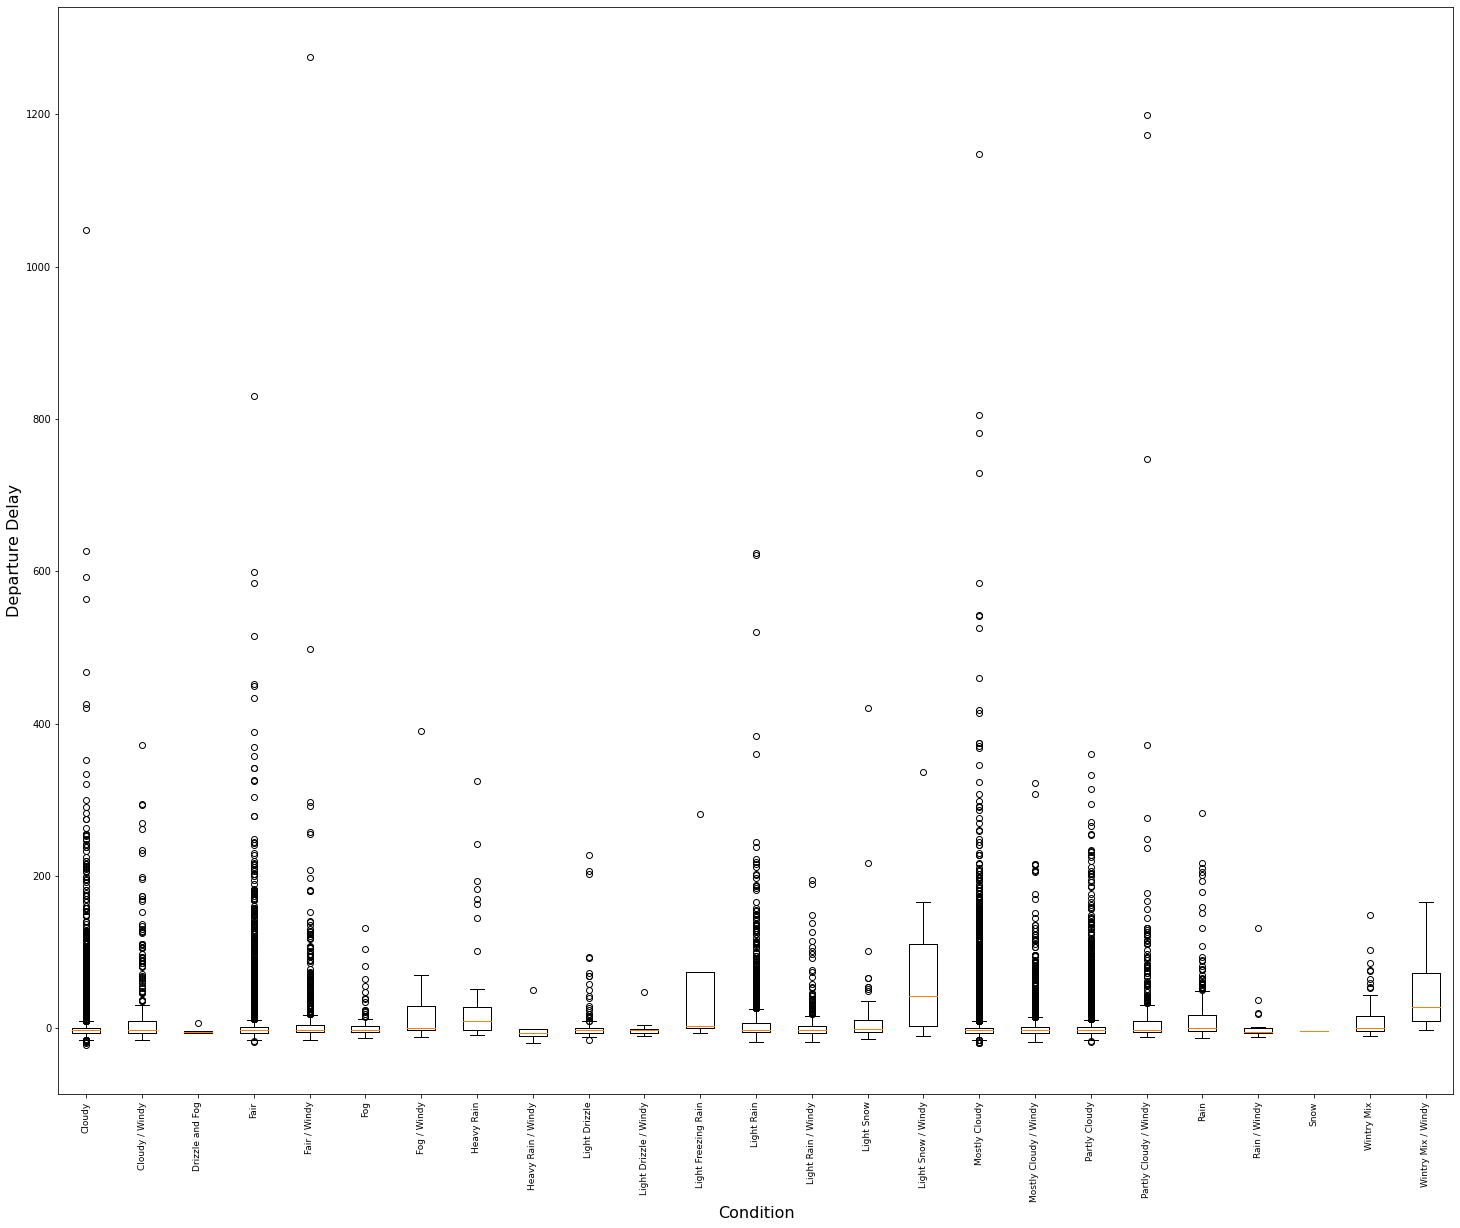

In [ ]:
# Display boxplots for each category of Condition
# Difficult to view because of outliers, but we choose later not to remove outliers

grouped_data = jfk.groupby('Condition')

# Create a list of lists containing the data for each category
category_data = [grouped_data.get_group(x)['DEP_DELAY'] for x in grouped_data.groups]

plt.figure(figsize=(25,20))
# Plot the boxplots
plt.boxplot(category_data, labels=grouped_data.groups.keys())

plt.ylabel("Departure Delay", fontsize=16)
plt.xlabel("Condition", fontsize=16)
plt.xticks(fontsize=9, rotation=90)
plt.show()

In [ ]:
# Calculating mean delay grouping by each category for Condition, Destination, Wind.

print("Condition")
print("+++++++++++++++++++++")
print("Mean")
print(jfk.groupby("Condition")['DEP_DELAY'].mean())
print()

print("Destination")
print("+++++++++++++++++++++")
print("Mean")
print(jfk.groupby("DEST")['DEP_DELAY'].mean())

print("Wind")
print("+++++++++++++++++++++")
print("Mean")
print(jfk.groupby("Wind")['DEP_DELAY'].mean())


Condition
+++++++++++++++++++++
Mean
Condition
Cloudy                    5.316106
Cloudy / Windy           18.695015
Drizzle and Fog          -3.000000
Fair                      6.032553
Fair / Windy              9.896514
Fog                       2.639456
Fog / Windy              25.892857
Heavy Rain               35.611111
Heavy Rain / Windy        1.166667
Light Drizzle             3.958763
Light Drizzle / Windy    -0.722222
Light Freezing Rain      70.000000
Light Rain                9.595710
Light Rain / Windy        6.236111
Light Snow               15.144737
Light Snow / Windy       63.625000
Mostly Cloudy             4.814953
Mostly Cloudy / Windy     5.855756
Partly Cloudy             5.227174
Partly Cloudy / Windy    15.950172
Rain                     14.495726
Rain / Windy              3.800000
Snow                     -4.000000
Wintry Mix               12.337349
Wintry Mix / Windy       54.750000
Name: DEP_DELAY, dtype: float64

Destination
+++++++++++++++++++++
Mean
DEST
A

In [ ]:
# One-hot encoding for categorical variables

one_hot = pd.get_dummies(jfk['OP_UNIQUE_CARRIER'])
jfk = jfk.drop('OP_UNIQUE_CARRIER',axis = 1)
jfk = jfk.join(one_hot)

one_hot = pd.get_dummies(jfk['DEST'])
jfk = jfk.drop('DEST',axis = 1)
jfk = jfk.join(one_hot)

one_hot = pd.get_dummies(jfk['Wind'])
jfk = jfk.drop('Wind',axis = 1)
jfk = jfk.join(one_hot)

one_hot = pd.get_dummies(jfk['Condition'])
jfk = jfk.drop('Condition',axis = 1)
jfk = jfk.join(one_hot)

# We want to treat month as a categorical variable
jfk.loc[jfk['MONTH']==1, 'MONTH'] = 'Jan'
jfk.loc[jfk['MONTH']==11, 'MONTH'] = 'Nov'
jfk.loc[jfk['MONTH']==12, 'MONTH'] = 'Dec'
one_hot = pd.get_dummies(jfk['MONTH'])
jfk = jfk.drop('MONTH', axis = 1)
jfk = jfk.join(one_hot)


In [ ]:
jfk.head()

DAY_OF_MONTH  DAY_OF_WEEK TAIL_NUM  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  \
0             1            5   N828JB         -1               124       636   
1             1            5   N992JB         -7               371      2475   
2             1            5   N959JB         40               181      1069   
3             1            5   N999JQ         -2               168       944   
4             1            5   N880DN         -4               139       760   

   CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature Dew Point  Humidity  \
0        324         323        448           48        34        58   
1        340         333        531           48        34        58   
2        301         341        482           48        34        58   
3        345         343        513           48        34        58   
4        360         356        499           46        32        58   

   Wind Speed  Wind Gust  Pressure  sch_dep  sch_arr  TAXI_OUT  9E  AA  AS  \
0          25         38     29.86        9       17        14   0   0   0   
1          25         38     29.86        9       17        15   0   0   0   
2          25         38     29.86        9       17        22   0   0   0   
3          25         38     29.86        9       17        12   0   0   0   
4          24         35     29.91        9       17        13   0   0   0   

   B6  DL  HA  MQ  OO  YX  ABQ  ATL  AUS  BNA  BOS  BQN  BTV  BUF  BUR  BWI  \
0   1   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0   
1   1   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0   
2   1   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0   
3   1   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0   
4   0   1   0   0   0   0    0    1    0    0    0    0    0    0    0    0   

   CHS  CLE  CLT  CMH  CVG  DCA  DEN  DFW  DTW  EGE  FLL  HNL  IAD  IAH  IND  \
0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   JAC  JAX  LAS  LAX  LGB  MCO  MIA  MSP  MSY  OAK  ONT  ORD  ORF  ORH  PBI  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   PDX  PHL  PHX  PIT  PSE  PSP  PWM  RDU  RIC  RNO  ROC  RSW  SAN  SAT  SAV  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   SEA  SFO  SJC  SJU  SLC  SMF  SRQ  STT  SYR  TPA  CALM  E  ENE  ESE  N  NE  \
0    0    0    0    0    0    0    0    0    0    0     0  0    0    0  0   0   
1    0    0    0    0    0    0    0    0    0    0     0  0    0    0  0   0   
2    0    0    0    0    0    0    0    0    0    0     0  0    0    0  0   0   
3    0    0    0    0    0    0    0    0    0    0     0  0    0    0  0   0   
4    0    0    0    0    0    0    0    0    0    0     0  0    0    0  0   0   

   NNE  NNW  NW  S  SE  SSE  SSW  SW  VAR  W  WNW  WSW  Cloudy  \
0    0    0   0  0   0    0    0   0    0  1    0    0       0   
1    0    0   0  0   0    0    0   0    0  1    0    0       0   
2    0    0   0  

In [ ]:
# There are too many categories for Tail Number, so we drop this column
# DEP_TIME_M = DEP_DELAY + CRS_DEP_M, so we remove it
# We want to predict delays before the flight leaves the gate, so we don't 
#  include taxi-out time

jfk = jfk.drop(columns = ['TAIL_NUM','DEP_TIME_M','TAXI_OUT'])

In [ ]:
# Change the type of Dew Point to integer.

jfk['Dew Point'] = jfk['Dew Point'].astype(int)

In [ ]:
jfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28819
Columns: 133 entries, MONTH to Wintry Mix / Windy
dtypes: float64(1), int64(15), uint8(117)
memory usage: 8.0 MB


# Train-test-validation split and more data exploration

In [ ]:
# Train-test-validation split for the data

from sklearn.model_selection import train_test_split 

jfk_train, jfk_test = train_test_split(jfk.copy(), test_size=0.2, random_state = 604)

jfk_train_train, jfk_val = train_test_split(jfk_train, test_size = 0.2, random_state = 604)

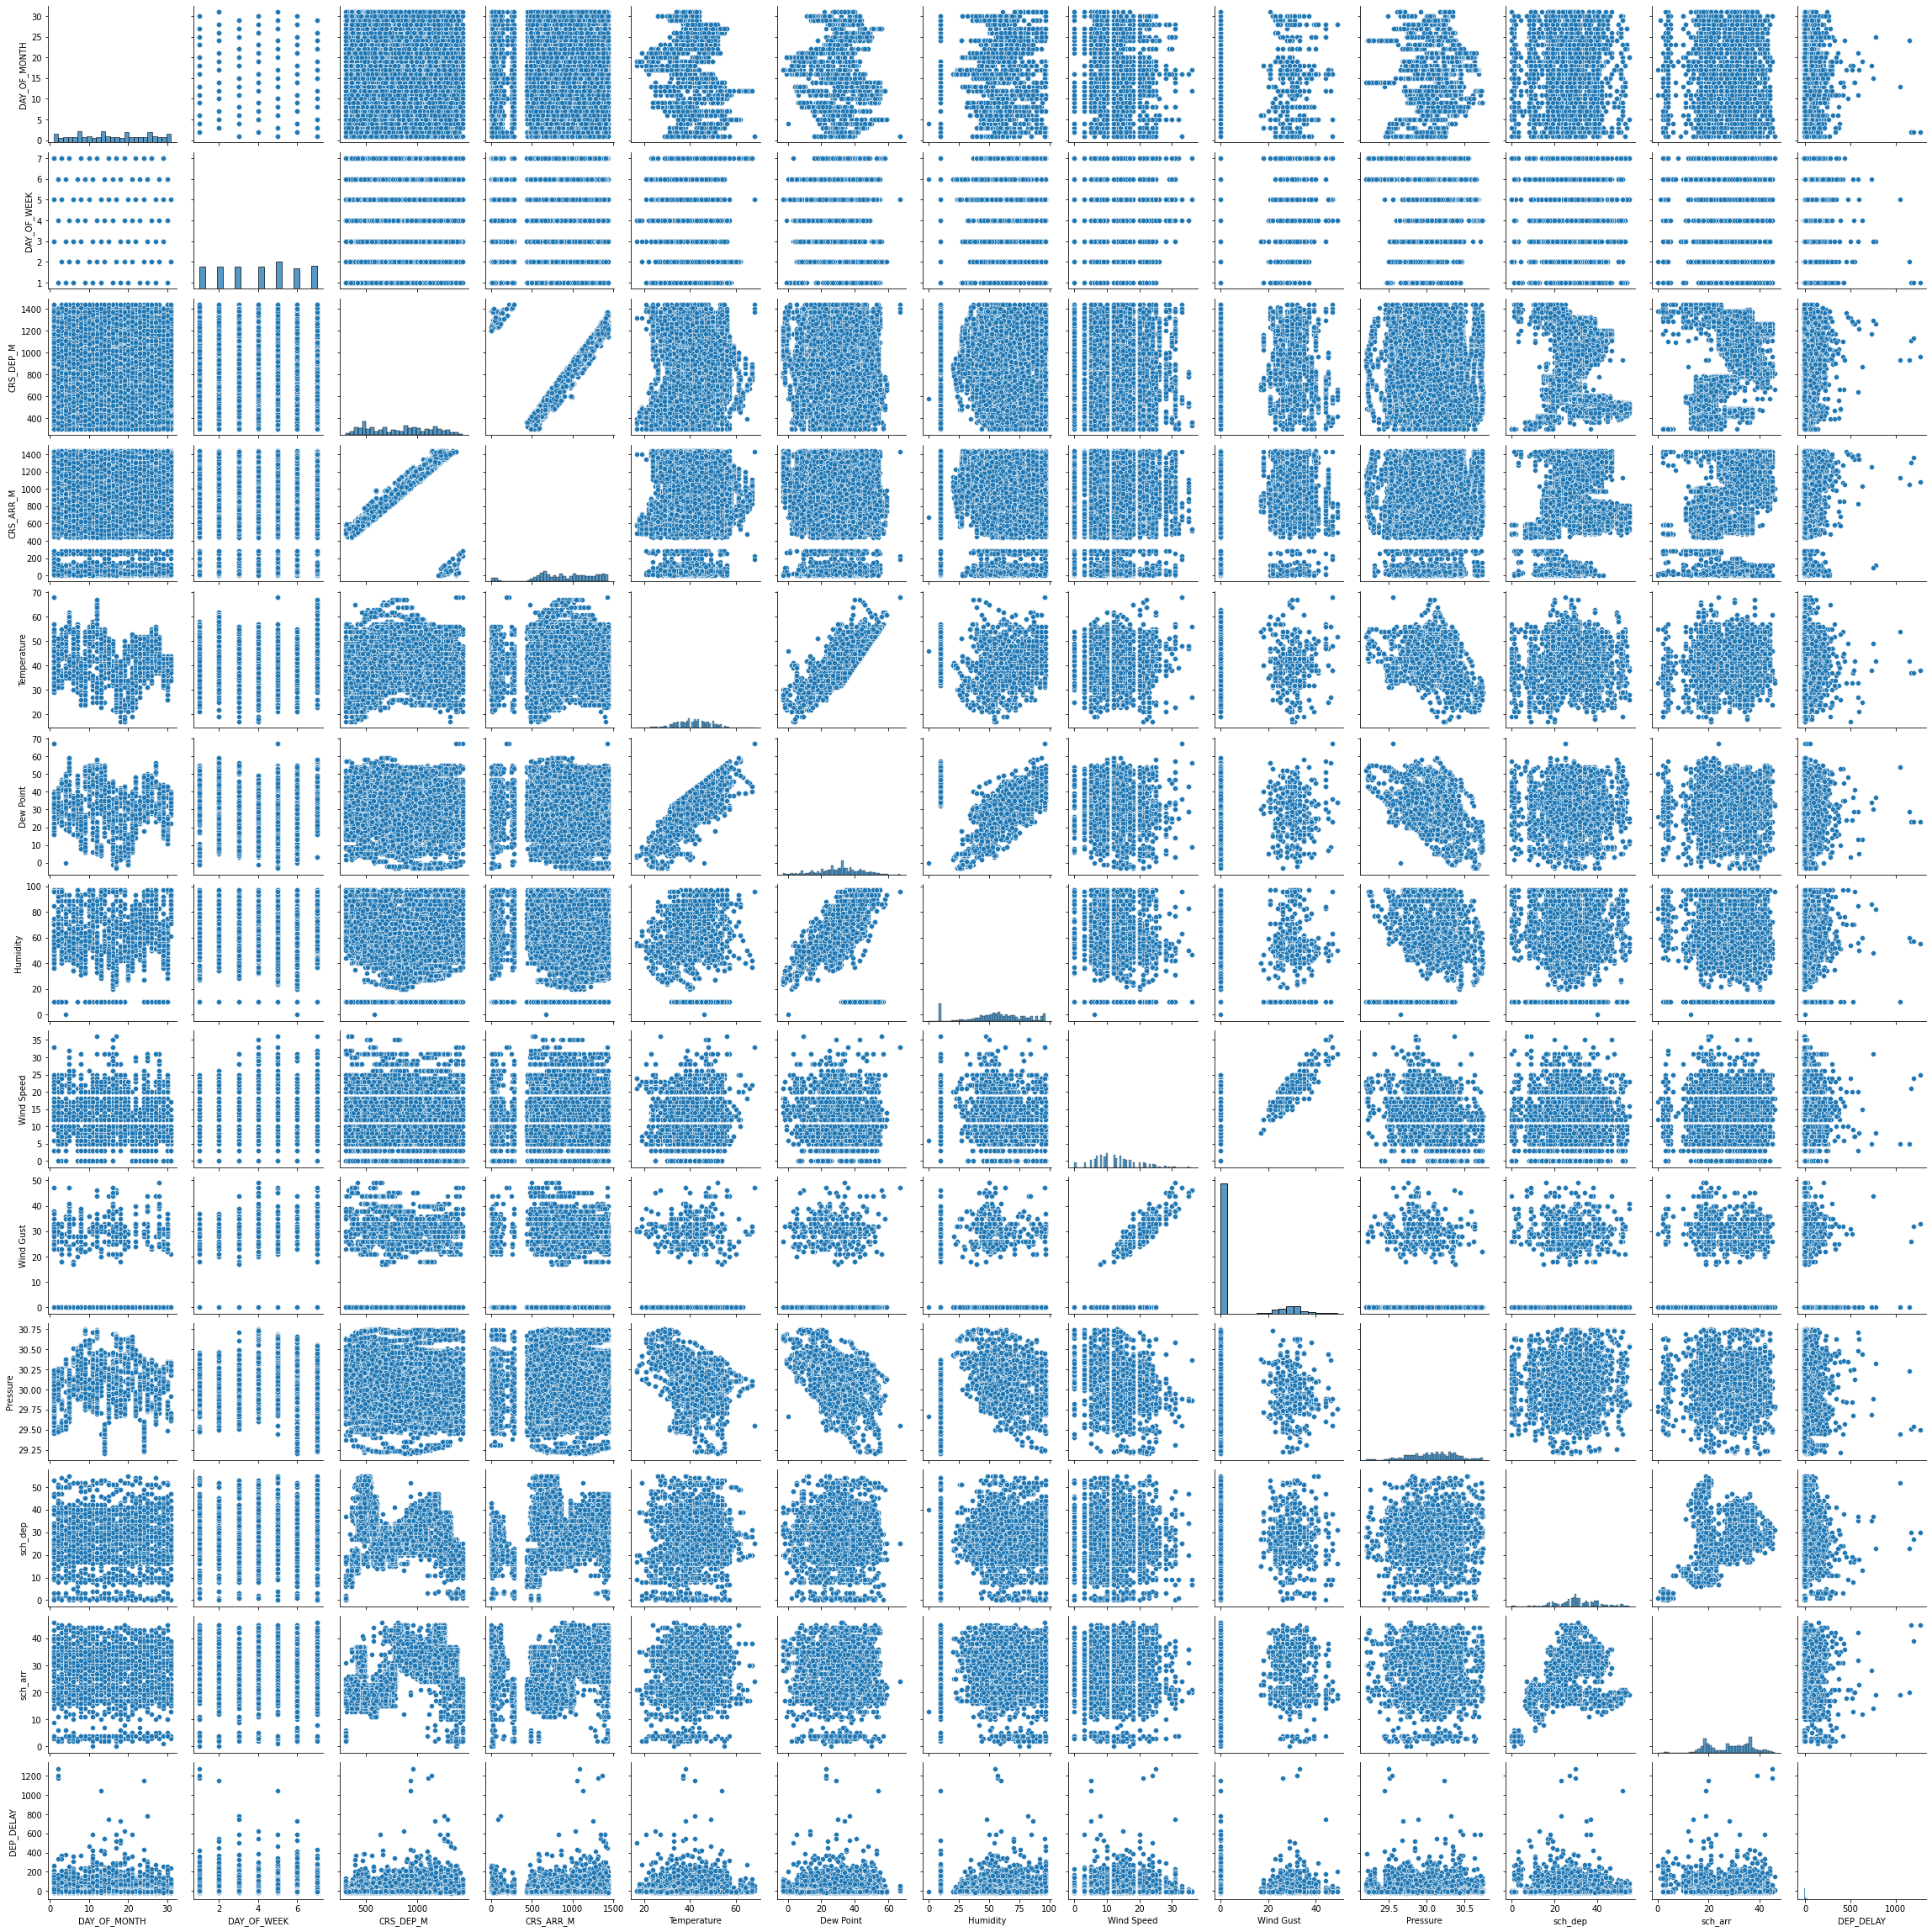

In [ ]:
# Pairplots for all pairs of variables.

import seaborn as sns

sns.pairplot(jfk_train_train[['DAY_OF_MONTH','DAY_OF_WEEK','CRS_DEP_M','CRS_ARR_M',
                        'Temperature','Dew Point','Humidity','Wind Speed',
                        'Wind Gust','Pressure','sch_dep','sch_arr','DEP_DELAY']])

In [ ]:
# Function to find outliers based on interquartile range. 

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
# Find outliers in departure delays.

find_outliers_IQR(jfk_train_train['DEP_DELAY']).describe()

DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  Temperature   Dew Point  \
count  2531.000000               0.0      57.0   109.000000  126.000000   
mean     65.672461               NaN    4983.0    46.146789   -0.952381   
std      85.757641               NaN       0.0    23.324135   10.665726   
min     -20.000000               NaN    4983.0    17.000000   -3.000000   
25%      23.000000               NaN    4983.0    19.000000   -3.000000   
50%      40.000000               NaN    4983.0    64.000000   -3.000000   
75%      75.000000               NaN    4983.0    66.000000   -2.000000   
max    1276.000000               NaN    4983.0    68.000000   67.000000   

       Humidity  Wind Speed    Wind Gust   Pressure     sch_dep  sch_arr  
count       1.0  213.000000  3406.000000  24.000000  438.000000      0.0  
mean        0.0   30.967136    30.076042  29.207917   16.977169      NaN  
std         NaN    1.620578     5.590933   0.004149   20.713352      NaN  
min         0.0   29.000000    17.000000  29.200000    0.000000      NaN  
25%         0.0   30.000000    26.000000  29.210000    3.000000      NaN  
50%         0.0   31.000000    30.000000  29.210000    8.000000      NaN  
75%         0.0   31.000000    33.000000  29.210000    9.000000      NaN  
max         0.0   36.000000    49.000000  29.210000   55.000000      NaN

In [ ]:
# We decide not to remove outliers, since we have no reason to believe they are
#  errors. The code is below, though.

# upper_limit = jfk_train_train['DEP_DELAY'].mean() + 3*jfk_train_train['DEP_DELAY'].std()

# print('the upper limit for departure delay is', upper_limit)

# lower_limit = jfk_train_train['DEP_DELAY'].mean() - 3*jfk_train_train['DEP_DELAY'].std()

# print('the lower limit for departure delay is', lower_limit)

# jfk_train_train['DEP_DELAY'] = np.where(jfk_train_train['DEP_DELAY'] > upper_limit,

#                             upper_limit,

#    np.where(

#        jfk_train_train['DEP_DELAY'] < lower_limit,

#        lower_limit,

#        jfk_train_train['DEP_DELAY']

#    )

# )

In [ ]:
jfk_train_train.corr()

DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  CRS_ELAPSED_TIME  \
DAY_OF_MONTH            1.000000    -0.035604  -0.037795          0.003135   
DAY_OF_WEEK            -0.035604     1.000000  -0.005328         -0.003953   
DEP_DELAY              -0.037795    -0.005328   1.000000         -0.029163   
CRS_ELAPSED_TIME        0.003135    -0.003953  -0.029163          1.000000   
DISTANCE               -0.003037    -0.001717  -0.030331          0.994486   
...                          ...          ...        ...               ...   
Wintry Mix             -0.035419    -0.044891   0.002316          0.017176   
Wintry Mix / Windy     -0.016666    -0.015835   0.021716          0.004688   
Dec                     0.037061     0.008532   0.106320          0.004695   
Jan                     0.004707    -0.027346  -0.037275          0.020468   
Nov                    -0.041234     0.018995  -0.067408         -0.025138   

                    DISTANCE  CRS_DEP_M  CRS_ARR_M  Temperature  Dew Point  \
DAY_OF_MONTH       -0.003037   0.004797   0.012509    -0.128136  -0.041156   
DAY_OF_WEEK        -0.001717   0.003471  -0.007236     0.014869  -0.069181   
DEP_DELAY          -0.030331   0.104879   0.039320    -0.032506  -0.001994   
CRS_ELAPSED_TIME    0.994486  -0.028494   0.039000    -0.015118   0.011103   
DISTANCE            1.000000  -0.038881   0.011778    -0.009086   0.013522   
...                      ...        ...        ...          ...        ...   
Wintry Mix          0.017713   0.036558   0.016851    -0.046524  -0.016029   
Wintry Mix / Windy  0.004796   0.002493   0.005413    -0.009234   0.002921   
Dec                -0.001924  -0.017409  -0.003570    -0.151739   0.044073   
Jan                 0.003239   0.003018   0.020410    -0.147846  -0.129002   
Nov                -0.001351   0.014129  -0.016935     0.297669   0.085844   

                    Humidity  Wind Speed  Wind Gust  Pressure   sch_dep  \
DAY_OF_MONTH        0.093541   -0.088979  -0.082797  0.015020  0.003507   
DAY_OF_WEEK         0.001697    0.098273   0.127816  0.102757  0.013865   
DEP_DELAY          -0.011980    0.071426   0.050072 -0.067492 -0.067483   
CRS_ELAPSED_TIME    0.017393   -0.019300  -0.018206  0.013204  0.083419   
DISTANCE            0.016008   -0.016666  -0.015354  0.008407  0.058403   
...                      ...         ...        ...       ...       ...   
Wintry Mix          0.030351   -0.033622  -0.019160 -0.013478 -0.000974   
Wintry Mix / Windy -0.002132    0.016801   0.020929 -0.021339  0.000984   
Dec                -0.012207   -0.066075  -0.066140 -0.013457  0.023406   
Jan                -0.015409    0.031050   0.047764  0.082060  0.012940   
Nov                 0.027469    0.033992   0.017306 -0.068971 -0.036030   

                     sch_arr        9E        AA        AS        B6  \
DAY_OF_MONTH        0.005569 -0.019565 -0.008988  0.003435  0.007341   
DAY_OF_WEEK         0.004799 -0.002924 -0.003676  0.003002  0.003335   
DEP_DELAY          -0.014791 -0.005890 -0.003883 -0.007827  0.024958   
CRS_ELAPSED_TIME   -0.063052 -0.388946  0.154825  0.294175  0.024037   
DISTANCE           -0.084589 -0.414788  0.143885  0.282713  0.066666   
...                      ...       ...       ...       ...       ...   
Wintry Mix          0.010860 -0.003244 -0.004792  0.004669 -0.008003   
Wintry Mix / Windy  0.012040 -0.004441  0.011900 -0.002116 -0.007383   
Dec                -0.003488 -0.007128  0.000564  0.000803  0.002263   
Jan                 0.029123  0.004247  0.001514 -0.000436 -0.006693   
Nov                -0.025747  0.002767 -0.002073 -0.000355  0.004478   

                          DL        HA        MQ        OO        YX  \
DAY_OF_MONTH        0.007781  0.001233 -0.006076 -0.014785  0.028593   
DAY_OF_WEEK        -0.001405  0.002739 -0.000607 -0.007430  0.008323   
DEP_DELAY          -0.010792 -0.011210 -0.012759  0.018656 -0.005852   
CRS_ELAPSED_TIME    0.181118  0.194478 -0.179016 -0.075559 -0.164906   
DISTANCE            

In [ ]:
# Splitting data into predictor versus target variables.

X_train_train, y_train_train = jfk_train_train.loc[:,jfk_train_train.columns != 'DEP_DELAY'], jfk_train_train.loc[:,'DEP_DELAY']

X_val, y_val = jfk_val.loc[:,jfk_val.columns != 'DEP_DELAY'], jfk_val.loc[:,'DEP_DELAY']

X_train, y_train = jfk_train.loc[:,jfk_train.columns != 'DEP_DELAY'], jfk_train.loc[:,'DEP_DELAY']

X_test, y_test = jfk_test.loc[:,jfk_test.columns != 'DEP_DELAY'], jfk_test.loc[:,'DEP_DELAY']


In [ ]:
# Vector containing correlations between the target and predictors.

corr_vec = X_train_train.corrwith(y_train_train)

In [ ]:
# Finding predictors whose correlation with delay is greater than 0.1 in absolute value.

corr_vec.loc[corr_vec.abs()>0.1]

CRS_DEP_M    0.104879
Dec          0.106320
dtype: float64

In [ ]:
# Ten features with highest correlation with the target.

corr_vec.abs().sort_values()[-10:]

CRS_ARR_M                0.039320
Partly Cloudy / Windy    0.048631
Wind Gust                0.050072
Light Snow / Windy       0.053343
Nov                      0.067408
sch_dep                  0.067483
Pressure                 0.067492
Wind Speed               0.071426
CRS_DEP_M                0.104879
Dec                      0.106320
dtype: float64

# First linear models and polynomial regression

In [ ]:
# Testing if the conditions of linear regression for modeling delay as a 
#  linear function of scheduled departure time.
# High omnibus and low prob(omnibus) indicate that linear regression is
#  not ideal.
# We see later that this holds as well for multiple linear regression with all
#  features.

import statsmodels.api as sm

y_train_log = np.log(y_train_train + 21)

# OLS regression
ols = sm.OLS(y_train_log, X_train_train['CRS_DEP_M'])
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              DEP_DELAY   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          1.235e+05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:33:01   Log-Likelihood:                         -28180.
No. Observations:               18443   AIC:                                  5.636e+04
Df Residuals:                   18442   BIC:                                  5.637e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRS_DEP_M      0.0033   9.28e-06    351.447      0.000       0.003       0.003
==============================================================================
Omnibus:                      142.078   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.106
Skew:                           0.052   Prob(JB):                     3.02e-22
Kurtosis:                       2.656   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Getting rmse for baseline model
from sklearn.metrics import mean_squared_error as mse

mean = y_train_train.mean()
print('rmse for baseline model on training set is', np.sqrt(mse(np.ones(len(y_train_train))*mean, y_train_train)))
print('rmse for baseline model on validation set is', np.sqrt(mse(np.ones(len(y_val))*mean, y_val)))

rmse for baseline model on training set is 39.89134428858723
rmse for baseline model on validation set is 37.0249663812207


In [ ]:
print(mean)

6.3166513040177845


In [ ]:
# Test polynomial regression for temperature
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
train_rmses = []
val_rmses = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    poly.fit(X_train_train['Temperature'].values.reshape(-1,1))
    X_poly_train = poly.transform(X_train_train['Temperature'].values.reshape(-1,1))
    X_poly_val = poly.transform(X_val['Temperature'].values.reshape(-1,1))
    
    # Fit linear regression model
    reg = LinearRegression()
    model = reg.fit(X_poly_train, y_train_train)
    
    # Evaluate performance on training and testing sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    train_rmse = np.sqrt(mse(y_train_train, y_train_pred))
    val_rmse = np.sqrt(mse(y_val, y_val_pred))
     
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

In [ ]:
print(train_rmses)
print(val_rmses)

[39.87026380606102, 39.85403068930219, 39.85352975963077, 39.85343262350811, 39.8485862993653]
[36.99695898078076, 36.99376584989317, 36.98605845811598, 36.989490968075465, 36.98253412478749]


In [ ]:
# Test polynomial regression for wind gust
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
train_rmses = []
val_rmses = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    poly.fit(X_train_train['Wind Gust'].values.reshape(-1,1))
    X_poly_train = poly.transform(X_train_train['Wind Gust'].values.reshape(-1,1))
    X_poly_val = poly.transform(X_val['Wind Gust'].values.reshape(-1,1))
    
    # Fit linear regression model
    reg = LinearRegression()
    model = reg.fit(X_poly_train, y_train_train)
    
    # Evaluate performance on training and testing sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    train_rmse = np.sqrt(mse(y_train_train, y_train_pred))
    val_rmse = np.sqrt(mse(y_val, y_val_pred))
     
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

In [ ]:
print(train_rmses)
print(val_rmses)

[39.84130472061411, 39.839414495392724, 39.831527619449915, 39.831074781357295, 39.82892745034763]
[36.98733608411733, 36.986670226897395, 36.99868943172757, 36.997528286202815, 37.002797663485865]


In [ ]:
# Test polynomial regression for number of scheduled departures
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
train_rmses = []
val_rmses = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    poly.fit(X_train_train['sch_dep'].values.reshape(-1,1))
    X_poly_train = poly.transform(X_train_train['sch_dep'].values.reshape(-1,1))
    X_poly_val = poly.transform(X_val['sch_dep'].values.reshape(-1,1))
    
    # Fit linear regression model
    reg = LinearRegression()
    model = reg.fit(X_poly_train, y_train_train)
    
    # Evaluate performance on training and testing sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    train_rmse = np.sqrt(mse(y_train_train, y_train_pred))
    val_rmse = np.sqrt(mse(y_val, y_val_pred))
     
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

In [ ]:
print(train_rmses)
print(val_rmses)

[39.800407630370586, 39.77674686960976, 39.77183338480223, 39.766999847046655, 39.7669746240369]
[36.92640798806096, 36.860826121292476, 36.80847786785581, 36.76408661745567, 36.76184928966404]


In [ ]:
# Test polynomial regression for number of scheduled arrivals
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
train_rmses = []
val_rmses = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    poly.fit(X_train_train['sch_arr'].values.reshape(-1,1))
    X_poly_train = poly.transform(X_train_train['sch_arr'].values.reshape(-1,1))
    X_poly_val = poly.transform(X_val['sch_arr'].values.reshape(-1,1))
    
    # Fit linear regression model
    reg = LinearRegression()
    model = reg.fit(X_poly_train, y_train_train)
    
    # Evaluate performance on training and testing sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    train_rmse = np.sqrt(mse(y_train_train, y_train_pred))
    val_rmse = np.sqrt(mse(y_val, y_val_pred))
     
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

In [ ]:
print(train_rmses)
print(val_rmses)

[39.886980423593165, 39.67196357487714, 39.56385943765231, 39.50217172417023, 39.47488308904628]
[37.023589531542406, 36.618289037753975, 36.319384229813735, 36.196245740878354, 36.23897177009304]


In [ ]:
# Test polynomial regression for scheduled departure time
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
train_rmses = []
val_rmses = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    poly.fit(X_train_train['CRS_DEP_M'].values.reshape(-1,1))
    X_poly_train = poly.transform(X_train_train['CRS_DEP_M'].values.reshape(-1,1))
    X_poly_val = poly.transform(X_val['CRS_DEP_M'].values.reshape(-1,1))
    
    # Fit linear regression model
    reg = LinearRegression()
    model = reg.fit(X_poly_train, y_train_train)
    
    # Evaluate performance on training and testing sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    train_rmse = np.sqrt(mse(y_train_train, y_train_pred))
    val_rmse = np.sqrt(mse(y_val, y_val_pred))
     
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

In [ ]:
print(train_rmses)
print(val_rmses)

[39.6713417313108, 39.67005823650842, 39.66941420274767, 39.668822232971394, 39.6670932796929]
[36.89790636963994, 36.90792405442539, 36.90998986321452, 36.906208210986044, 36.90692955231095]


In [ ]:
# Test polynomial regression for scheduled arrival time
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
train_rmses = []
val_rmses = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    poly.fit(X_train_train['CRS_ARR_M'].values.reshape(-1,1))
    X_poly_train = poly.transform(X_train_train['CRS_ARR_M'].values.reshape(-1,1))
    X_poly_val = poly.transform(X_val['CRS_ARR_M'].values.reshape(-1,1))
    
    # Fit linear regression model
    reg = LinearRegression()
    model = reg.fit(X_poly_train, y_train_train)
    
    # Evaluate performance on training and testing sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    train_rmse = np.sqrt(mse(y_train_train, y_train_pred))
    val_rmse = np.sqrt(mse(y_val, y_val_pred))
     
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

In [ ]:
print(train_rmses)
print(val_rmses)

[39.86049536559203, 39.72122516861916, 39.697626476043325, 39.688502209513636, 39.67791606972904]
[36.997511433524075, 36.989291375723155, 36.959764099621985, 36.96101708398001, 36.932743466164624]


In [ ]:
# Testing if the conditions of multiple linear regression are
#  satsified.
# High omnibus and low prob(omnibus) indicate that the 
#  residuals are not normally distributed, so this model is not 
#  not the best for predicting delays.
# Below, we also try a log transformation of the target to see
#  if the problem is fixed. It is not.

import statsmodels.api as sm

# OLS regression
ols = sm.OLS(y_train_train, X_train_train)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEP_DELAY   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.818
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          2.36e-177
Time:                        16:40:59   Log-Likelihood:                -93541.
No. Observations:               18443   AIC:                         1.873e+05
Df Residuals:                   18314   BIC:                         1.883e+05
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
DAY_OF_MONTH             -0.2297      0.036     -6.377      0.000      -0.300      -0.159
DAY_OF_WEEK              -0.0227      0.154     -0.147      0.883      -0.324       0.279
CRS_ELAPSED_TIME          0.1372      0.055      2.505      0.012       0.030       0.244
DISTANCE                 -0.0090      0.008     -1.194      0.232      -0.024       0.006
CRS_DEP_M                 0.0201      0.001     15.766      0.000       0.018       0.023
CRS_ARR_M                 0.0036      0.001      3.207      0.001       0.001       0.006
Temperature              -0.4990      0.080     -6.222      0.000      -0.656      -0.342
Dew Point                 0.2681      0.062      4.304      0.000       0.146       0.390
Humidity                 -0.0239      0.015     -1.572      0.116      -0.054       0.006
Wind Speed                0.3335      0.088      3.774      0.000       0.160       0.507
Wind Gust                -0.0098      0.041     -0.241      0.809      -0.090       0.070
Pressure                 -9.1796      1.453     -6.320      0.000     -12.027      -6.332
sch_dep                  -0.3114      0.034     -9.215      0.000      -0.378      -0.245
sch_arr                  -0.5021      0.044    -11.494      0.000      -0.588      -0.416
9E                       52.2993      8.548      6.118      0.000      35.545      69.054
AA                       58.0123      8.539      6.794      0.000      41.275      74.750
AS                       61.2409      8.624      7.101      0.000      44.337      78.145
B6                       59.9279      8.502      7.049      0.000      43.264      76.592
DL                       59.0905      8.517      6.938      0.000      42.397      75.784
HA                       51.7433     15.539      3.330      0.001      21.286      82.201
MQ                       48.7851      8.640      5.646      0.000      31.849      65.721
OO                       61.9322      8.925      6.940      0.000      44.439      79.425
YX                       52.3764      8.691      6.026      0.000      35.341      69.412
ABQ                      -8.2930      6.764     -1.226      0.220     -21.550       4.964
ATL                      12.4261      2.762      4.498      0.000       7.012      17.841
AUS                       1.2211      2.472      0.494      0.621      -3.623       6.066
BNA                      15.3113      3.573      4.286      0.000       8.309      22.314
BOS                      20.7862      3.410      6.095      0.000      14.101      27.471
BQN                      -9.0797      4.983     -1.822      0.068     -18.846       0.687
BTV                      19.7647      3.719      5.314      0.000      12.474      27.055
BUF                      17.8297      3.353      5.317      0.000      11.257      24.403
BUR                    

In [ ]:
# Calculating rmse on the validation set.

from sklearn.metrics import mean_squared_error as mse 

model = res.predict(X_val)

print('rmse is', np.sqrt(mse(model, y_val)))

rmse is 36.380063284571946


In [ ]:
# Checking for multicollinearity. VIF is too high if >5.
# We care about multicollinearity for the sake of interpretation, but it is
#  not necessary to remove variables with high multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence

vif = pd.Series([variance_inflation_factor(X_train_train.values, i) for i in range(X_train_train.shape[1])], index=X_train_train.columns)
len(vif[vif > 5]), vif[vif > 5]

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


(120, CRS_ELAPSED_TIME      464.461807
 DISTANCE                     inf
 Dew Point               6.849739
 9E                           inf
 AA                           inf
                          ...    
 Rain                         inf
 Rain / Windy                 inf
 Snow                         inf
 Wintry Mix                   inf
 Wintry Mix / Windy           inf
 Length: 120, dtype: float64)

0.4100037308812327


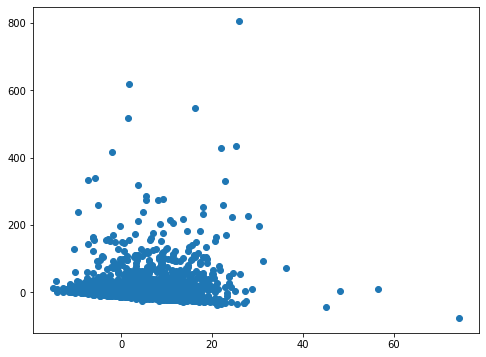

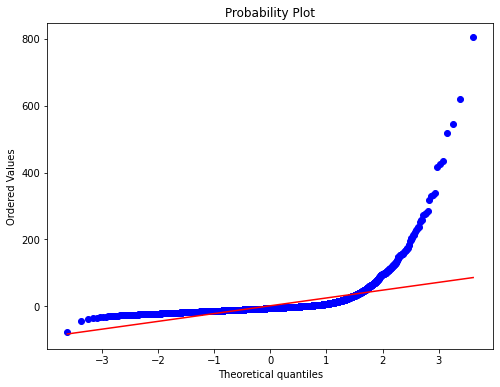

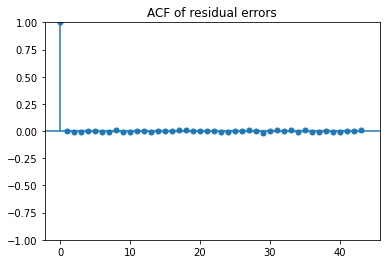

In [ ]:
# Normality and autocorrelation of residuals
import matplotlib.pyplot as plt 
import scipy as sp
from statsmodels.graphics.tsaplots import plot_acf

model = res.predict(X_val)

pred_val = model.copy()
true_val = y_val.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_ = ax.scatter(pred_val, residual)

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

print(r**2)

plot_acf(res.resid, title='ACF of residual errors')
plt.show()

In [ ]:
# The normal Q-Q plot shows that the data is right-skewed.
# We attempt to fix this by applying a log transformation to
#     the target values

y_train_train_log = np.log(y_train_train +22)

In [ ]:
# Now we test if the log transformation fixed the non-normality of the residuals
# The Q-Q plot is better, but omnibus is still very high. The conditions of multiple
#  linear regression are not satisfied.

ols = sm.OLS(y_train_train_log, X_train_train)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEP_DELAY   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     15.32
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          1.66e-304
Time:                        17:06:37   Log-Likelihood:                -13860.
No. Observations:               18443   AIC:                         2.798e+04
Df Residuals:                   18315   BIC:                         2.898e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MONTH                     0.0106      0.001     12.651      0.000       0.009       0.012
DAY_OF_MONTH             -0.0044      0.000     -9.206      0.000      -0.005      -0.003
DAY_OF_WEEK               0.0059      0.002      2.895      0.004       0.002       0.010
CRS_ELAPSED_TIME          0.0059      0.001      8.597      0.000       0.005       0.007
DISTANCE                 -0.0003      0.000     -3.208      0.001      -0.001      -0.000
CRS_DEP_M                 0.0003   1.69e-05     18.674      0.000       0.000       0.000
CRS_ARR_M              1.555e-05   1.47e-05      1.055      0.291   -1.33e-05    4.44e-05
Temperature              -0.0127      0.001    -12.785      0.000      -0.015      -0.011
Dew Point                 0.0058      0.001      7.211      0.000       0.004       0.007
Humidity                 -0.0010      0.000     -4.745      0.000      -0.001      -0.001
Wind Speed                0.0096      0.001      8.226      0.000       0.007       0.012
Wind Gust                -0.0006      0.001     -1.150      0.250      -0.002       0.000
Pressure                 -0.0732      0.019     -3.822      0.000      -0.111      -0.036
sch_dep                  -0.0017      0.000     -3.853      0.000      -0.003      -0.001
sch_arr                  -0.0034      0.001     -5.781      0.000      -0.004      -0.002
9E                        2.1888      0.259      8.462      0.000       1.682       2.696
AA                        2.3054      0.259      8.915      0.000       1.799       2.812
AS                        2.3227      0.259      8.963      0.000       1.815       2.831
B6                        2.3465      0.258      9.078      0.000       1.840       2.853
DL                        2.3515      0.259      9.093      0.000       1.845       2.858
HA                        2.0414      0.316      6.458      0.000       1.422       2.661
MQ                        2.0781      0.259      8.021      0.000       1.570       2.586
OO                        2.2992      0.261      8.825      0.000       1.789       2.810
YX                        2.1676      0.260      8.347      0.000       1.659       2.677
ABQ                      -0.2147      0.090     -2.382      0.017      -0.391      -0.038
ATL                       0.6166      0.067      9.143      0.000       0.484       0.749
AUS                       0.0968      0.039      2.471      0.013       0.020       0.174
BNA                       0.5265      0.074      7.118      0.000       0.382       0.672
BOS                       0.8633      0.095      9.088      0.000       0.677       1.049
BQN                       0.2320      0.069      3.380      0.001       0.097       0.367
BTV                       0.8474      0.094      9.026      0.000       0.663       1.031
BUF                    

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


nan


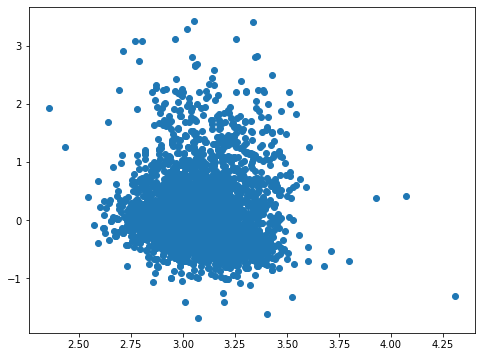

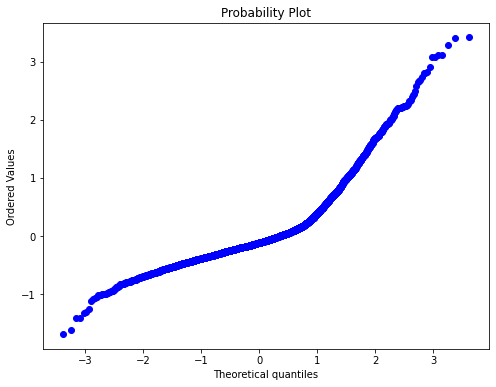

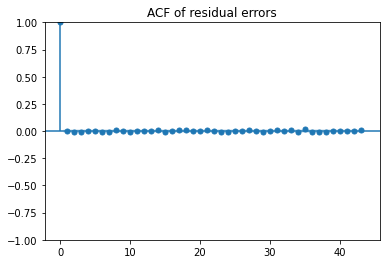

In [ ]:
model = res.predict(X_val)
y_val_log = np.log(y_val + 22)

pred_val = model.copy()
true_val = y_val_log.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_ = ax.scatter(pred_val, residual)

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

print(r**2)

plot_acf(res.resid, title='ACF of residual errors')
plt.show()

In [ ]:
# Try a square root transformation of data.
# Omnibus is still too high.

y_train_train_sqrt = np.sqrt(y_train_train + 21)

ols = sm.OLS(y_train_train_sqrt, X_train_train)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEP_DELAY   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     13.76
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          4.21e-268
Time:                        19:17:30   Log-Likelihood:                -35306.
No. Observations:               18443   AIC:                         7.087e+04
Df Residuals:                   18315   BIC:                         7.187e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MONTH                     0.0309      0.003     11.530      0.000       0.026       0.036
DAY_OF_MONTH             -0.0127      0.002     -8.296      0.000      -0.016      -0.010
DAY_OF_WEEK               0.0153      0.007      2.336      0.019       0.002       0.028
CRS_ELAPSED_TIME          0.0184      0.002      8.382      0.000       0.014       0.023
DISTANCE                 -0.0013      0.000     -4.025      0.000      -0.002      -0.001
CRS_DEP_M                 0.0010    5.4e-05     18.888      0.000       0.001       0.001
CRS_ARR_M              5.595e-05   4.72e-05      1.186      0.235   -3.65e-05       0.000
Temperature              -0.0400      0.003    -12.548      0.000      -0.046      -0.034
Dew Point                 0.0189      0.003      7.287      0.000       0.014       0.024
Humidity                 -0.0028      0.001     -4.328      0.000      -0.004      -0.002
Wind Speed                0.0297      0.004      7.934      0.000       0.022       0.037
Wind Gust                -0.0026      0.002     -1.496      0.135      -0.006       0.001
Pressure                 -0.2800      0.061     -4.567      0.000      -0.400      -0.160
sch_dep                  -0.0095      0.001     -6.620      0.000      -0.012      -0.007
sch_arr                  -0.0154      0.002     -8.267      0.000      -0.019      -0.012
9E                        5.4664      0.827      6.606      0.000       3.845       7.088
AA                        5.8455      0.827      7.066      0.000       4.224       7.467
AS                        6.0008      0.829      7.239      0.000       4.376       7.626
B6                        6.0097      0.827      7.268      0.000       4.389       7.630
DL                        5.9606      0.827      7.205      0.000       4.339       7.582
HA                        5.1710      1.011      5.113      0.000       3.189       7.153
MQ                        5.3067      0.829      6.403      0.000       3.682       6.931
OO                        5.7513      0.833      6.901      0.000       4.118       7.385
YX                        5.4353      0.831      6.543      0.000       3.807       7.064
ABQ                      -0.6256      0.288     -2.170      0.030      -1.191      -0.060
ATL                       1.4886      0.216      6.900      0.000       1.066       1.911
AUS                       0.2083      0.125      1.662      0.097      -0.037       0.454
BNA                       1.3906      0.237      5.877      0.000       0.927       1.854
BOS                       2.1861      0.304      7.194      0.000       1.591       2.782
BQN                       0.4750      0.220      2.163      0.031       0.045       0.905
BTV                       2.2332      0.300      7.435      0.000       1.644       2.822
BUF                    

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan


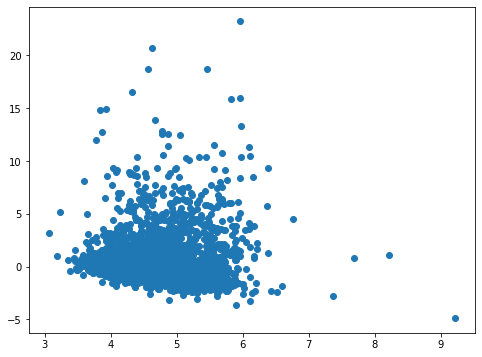

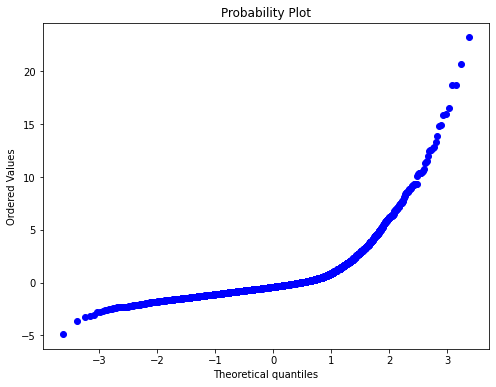

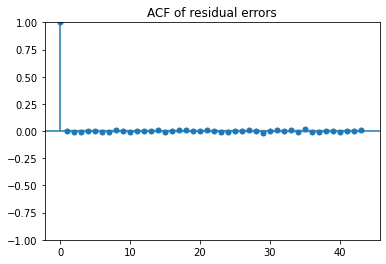

In [ ]:
model = res.predict(X_val)
y_val_sqrt = np.sqrt(y_val + 21)

pred_val = model.copy()
true_val = y_val_sqrt.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_ = ax.scatter(pred_val, residual)

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

print(r**2)

plot_acf(res.resid, title='ACF of residual errors')
plt.show()

In [ ]:
# Try a log-log transformation of data.
# Omnibus is still too high.

y_train_train_log_log = np.log(np.log((y_train_train + 24)))

ols = sm.OLS(y_train_train_log_log, X_train_train)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEP_DELAY   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     16.02
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          9.44e-321
Time:                        17:10:09   Log-Likelihood:                 10611.
No. Observations:               18443   AIC:                        -2.097e+04
Df Residuals:                   18315   BIC:                        -1.997e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MONTH                     0.0029      0.000     12.972      0.000       0.002       0.003
DAY_OF_MONTH             -0.0012      0.000     -9.533      0.000      -0.001      -0.001
DAY_OF_WEEK               0.0017      0.001      3.129      0.002       0.001       0.003
CRS_ELAPSED_TIME          0.0016      0.000      8.609      0.000       0.001       0.002
DISTANCE              -6.508e-05   2.77e-05     -2.346      0.019      -0.000   -1.07e-05
CRS_DEP_M              8.212e-05   4.48e-06     18.320      0.000    7.33e-05    9.09e-05
CRS_ARR_M              4.032e-06   3.91e-06      1.031      0.303   -3.63e-06    1.17e-05
Temperature              -0.0034      0.000    -12.750      0.000      -0.004      -0.003
Dew Point                 0.0015      0.000      7.092      0.000       0.001       0.002
Humidity                 -0.0003   5.33e-05     -4.856      0.000      -0.000      -0.000
Wind Speed                0.0026      0.000      8.244      0.000       0.002       0.003
Wind Gust                -0.0001      0.000     -0.957      0.339      -0.000       0.000
Pressure                 -0.0175      0.005     -3.436      0.001      -0.027      -0.008
sch_dep                  -0.0003      0.000     -2.693      0.007      -0.001   -8.71e-05
sch_arr                  -0.0007      0.000     -4.728      0.000      -0.001      -0.000
9E                        0.6967      0.069     10.153      0.000       0.562       0.831
AA                        0.7268      0.069     10.593      0.000       0.592       0.861
AS                        0.7265      0.069     10.567      0.000       0.592       0.861
B6                        0.7362      0.069     10.735      0.000       0.602       0.871
DL                        0.7402      0.069     10.788      0.000       0.606       0.875
HA                        0.6521      0.084      7.776      0.000       0.488       0.817
MQ                        0.6593      0.069      9.592      0.000       0.525       0.794
OO                        0.7283      0.069     10.536      0.000       0.593       0.864
YX                        0.6899      0.069     10.013      0.000       0.555       0.825
ABQ                      -0.0562      0.024     -2.351      0.019      -0.103      -0.009
ATL                       0.1955      0.018     10.924      0.000       0.160       0.231
AUS                       0.0354      0.010      3.402      0.001       0.015       0.056
BNA                       0.1651      0.020      8.413      0.000       0.127       0.204
BOS                       0.2713      0.025     10.764      0.000       0.222       0.321
BQN                       0.0758      0.018      4.160      0.000       0.040       0.111
BTV                       0.2619      0.025     10.512      0.000       0.213       0.311
BUF                    

0.8747137845924093


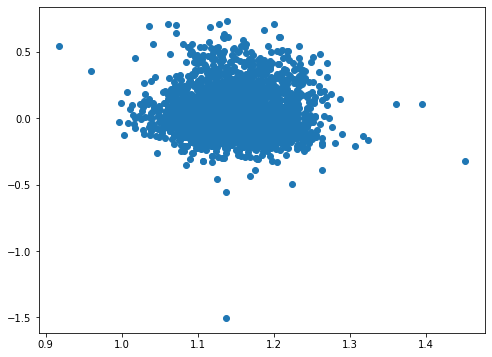

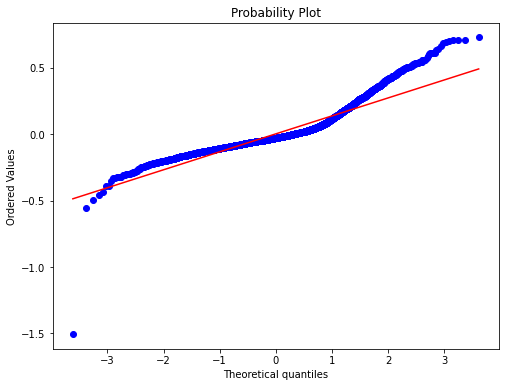

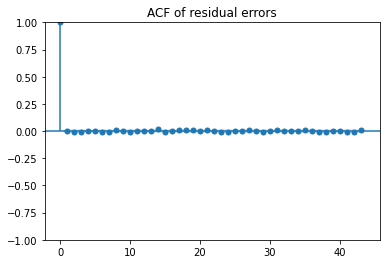

In [ ]:
model = res.predict(X_val)
y_val_log_log = np.log(np.log(y_val + 24))

pred_val = model.copy()
true_val = y_val_log_log.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_ = ax.scatter(pred_val, residual)

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

print(r**2)

plot_acf(res.resid, title='ACF of residual errors')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse 

print('rmse is', np.sqrt(mse(np.exp(model), np.exp(y_val_log))))

rmse is 37.11961736264224


In [ ]:
print('rmse is', np.sqrt(mse(np.exp(np.exp(model)), np.exp(np.exp(y_val_log_log)))))

rmse is 37.2708959712203


In [ ]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()
model = reg.fit(X_train_train,y_train_train)
print('r-squared for the training set is',model.score(X_train_train,y_train_train))
pred = model.predict(X_val)
print('r-squared for the validation set is',model.score(X_val,y_val))

r-squared for the training set is 0.07920210383231585
r-squared for the validation set is 0.029998103228483175


In [ ]:
# Ways to improve: include interaction terms, polynomial regression, 
#  cross-validation.


In [ ]:
from sklearn.metrics import mean_squared_error as mse  

print('rmse is', np.sqrt(mse(pred,y_val)))


rmse is 36.46488270514761


# Principal component analysis

In [ ]:
# Applying PCA and then multiple linear regression.
# PCA reduces dimension and multicollinearity,
#    of which there is much in our data.

from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_train)

reg = LinearRegression()
model = reg.fit(X_train_reduced, y_train_train)
X_val_reduced = pca.transform(X_val)
pred = model.predict(X_val_reduced)
print('rmse is', np.sqrt(mse(pred, y_val)))

print('components from PCA are', pca.components_, pca.feature_names_in_)

rmse is 36.493031502802296
components from PCA are [[-1.98270330e-05 -2.86635573e-05 -3.97127080e-06 ...  6.95087204e-08
   1.05194689e-06  5.58481724e-08]
 [-2.03867744e-04  2.44360218e-04 -1.80552713e-05 ...  1.59531062e-08
   3.89197709e-06  1.32627456e-07]
 [ 2.65724940e-04 -2.29221999e-04  8.31033607e-05 ... -1.48499409e-07
   5.47096483e-06 -8.42943877e-08]
 ...
 [-5.47733892e-03  5.30127491e-04 -5.27371743e-03 ...  1.77228291e-04
  -9.63736047e-05  6.81055444e-05]
 [-3.41478814e-03  2.08749847e-04  2.64818112e-03 ...  2.32172815e-04
   2.46533022e-03  8.86469680e-05]
 [ 1.18401687e-03 -6.82418601e-04 -1.47715393e-03 ...  1.12159368e-04
  -1.66596857e-03  2.21746041e-04]] ['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'CRS_ELAPSED_TIME' 'DISTANCE'
 'CRS_DEP_M' 'CRS_ARR_M' 'Temperature' 'Dew Point' 'Humidity' 'Wind Speed'
 'Wind Gust' 'Pressure' 'sch_dep' 'sch_arr' '9E' 'AA' 'AS' 'B6' 'DL' 'HA'
 'MQ' 'OO' 'YX' 'ABQ' 'ATL' 'AUS' 'BNA' 'BOS' 'BQN' 'BTV' 'BUF' 'BUR'
 'BWI' 'CHS' 'CLE' 'CLT' '

In [ ]:
# Checking if the PCA features satisfy the conditions of linear regression.

ols = sm.OLS(y_train_train, X_train_reduced)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              DEP_DELAY   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              54.30
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                   5.11e-211
Time:                        21:24:14   Log-Likelihood:                         -84803.
No. Observations:               18443   AIC:                                  1.696e+05
Df Residuals:                   18423   BIC:                                  1.698e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0008      0.000     -4.019      0.000      -0.001      -0.000
x2             0.0055      0.000     12.133      0.000       0.005       0.006
x3             0.0100      0.001     13.298      0.000       0.009       0.012
x4             0.0271      0.007      3.645      0.000       0.013       0.042
x5             0.0436      0.013      3.473      0.001       0.019       0.068
x6             0.1096      0.014      7.882      0.000       0.082       0.137
x7            -0.0380      0.015     -2.572      0.010      -0.067      -0.009
x8            -0.0970      0.020     -4.899      0.000      -0.136      -0.058
x9            -0.1233      0.021     -5.949      0.000      -0.164      -0.083
x10            0.2908      0.026     11.264      0.000       0.240       0.341
x11           -0.3306      0.036     -9.094      0.000      -0.402      -0.259
x12           -0.0858      0.041     -2.093      0.036      -0.166      -0.005
x13           -0.7887      0.046    -17.163      0.000      -0.879      -0.699
x14            0.1497      0.091      1.649      0.099      -0.028       0.328
x15           -0.7405      0.345     -2.147      0.032      -1.417      -0.064
x16            0.2906      0.354      0.820      0.412      -0.404       0.985
x17           -3.2862      0.428     -7.682      0.000      -4.125      -2.448
x18            0.3692      0.452      0.816      0.414      -0.517       1.255
x19            1.1786      0.502      2.348      0.019       0.195       2.163
x20            1.6368      0.503      3.255      0.001       0.651       2.622
==============================================================================
Omnibus:                    12321.161   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132531.198
Skew:                           3.210   Prob(JB):                         0.00
Kurtosis:                      14.456   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

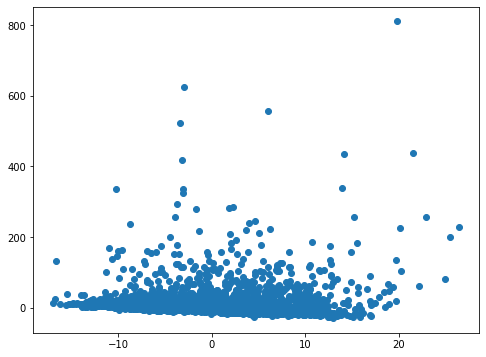

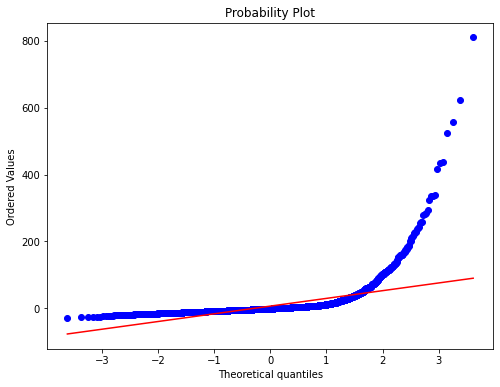

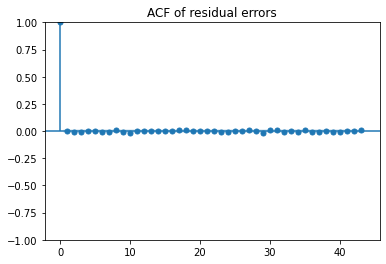

In [ ]:
# Checking residual plots for linear regression with PCA

pred = res.predict(X_val_reduced)

pred_val = pred.copy()
true_val = y_val.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_ = ax.scatter(pred_val, residual)

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

plot_acf(res.resid, title='ACF of residual errors')
plt.show()

In [ ]:
# PCA w/ regression again, but this time with log transformation of y

from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_train)

y_train_log = np.log(y_train_train + 24)
y_val_log = np.log(y_val + 24)

reg = LinearRegression()
model = reg.fit(X_train_reduced, y_train_log)
X_val_reduced = pca.transform(X_val)
pred = model.predict(X_val_reduced)
print('rmse is', np.sqrt(mse(np.exp(pred), np.exp(y_val_log))))

print('components from PCA are', pca.components_, pca.feature_names_in_)

rmse is 37.11038397500452
components from PCA are [[-1.98270330e-05 -2.86635573e-05 -3.97127080e-06 ...  6.95087204e-08
   1.05194689e-06  5.58481724e-08]
 [-2.03867744e-04  2.44360218e-04 -1.80552713e-05 ...  1.59531062e-08
   3.89197709e-06  1.32627456e-07]
 [ 2.65724940e-04 -2.29221999e-04  8.31033607e-05 ... -1.48499409e-07
   5.47096483e-06 -8.42943877e-08]
 ...
 [-5.47473269e-03  5.33935833e-04 -5.31205054e-03 ...  1.78043151e-04
  -4.47844371e-05  6.94145926e-05]
 [-3.06113209e-03  1.04104425e-04  2.19058813e-03 ...  2.57017122e-04
   2.09652302e-03  1.26922425e-04]
 [-1.85951187e-03  6.49945268e-04  2.16899109e-03 ... -7.86116898e-05
   2.04661506e-03 -1.98451804e-04]] ['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'CRS_ELAPSED_TIME' 'DISTANCE'
 'CRS_DEP_M' 'CRS_ARR_M' 'Temperature' 'Dew Point' 'Humidity' 'Wind Speed'
 'Wind Gust' 'Pressure' 'sch_dep' 'sch_arr' '9E' 'AA' 'AS' 'B6' 'DL' 'HA'
 'MQ' 'OO' 'YX' 'ABQ' 'ATL' 'AUS' 'BNA' 'BOS' 'BQN' 'BTV' 'BUF' 'BUR'
 'BWI' 'CHS' 'CLE' 'CLT' 'C

In [ ]:
ols = sm.OLS(y_train_log, X_train_reduced)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              DEP_DELAY   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.481
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                      0.0764
Time:                        21:30:37   Log-Likelihood:                         -47724.
No. Observations:               18443   AIC:                                  9.549e+04
Df Residuals:                   18423   BIC:                                  9.564e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -3.17e-06   2.65e-05     -0.119      0.905   -5.52e-05    4.88e-05
x2             0.0001   6.02e-05      2.378      0.017    2.52e-05       0.000
x3             0.0002      0.000      1.993      0.046    3.37e-06       0.000
x4             0.0009      0.001      0.864      0.387      -0.001       0.003
x5             0.0011      0.002      0.634      0.526      -0.002       0.004
x6             0.0020      0.002      1.048      0.295      -0.002       0.006
x7            -0.0015      0.002     -0.748      0.454      -0.005       0.002
x8             0.0003      0.003      0.109      0.913      -0.005       0.005
x9            -0.0029      0.003     -1.029      0.304      -0.008       0.003
x10            0.0039      0.003      1.131      0.258      -0.003       0.011
x11           -0.0085      0.005     -1.744      0.081      -0.018       0.001
x12           -0.0025      0.005     -0.464      0.643      -0.013       0.008
x13           -0.0175      0.006     -2.847      0.004      -0.030      -0.005
x14            0.0049      0.012      0.404      0.686      -0.019       0.029
x15            0.0126      0.046      0.273      0.785      -0.078       0.103
x16            0.0046      0.047      0.096      0.923      -0.088       0.098
x17           -0.0901      0.057     -1.574      0.116      -0.202       0.022
x18            0.0131      0.061      0.217      0.828      -0.106       0.132
x19            0.0398      0.067      0.592      0.554      -0.092       0.172
x20           -0.0391      0.067     -0.581      0.561      -0.171       0.093
==============================================================================
Omnibus:                     5838.323   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16762.914
Skew:                           1.683   Prob(JB):                         0.00
Kurtosis:                       6.238   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

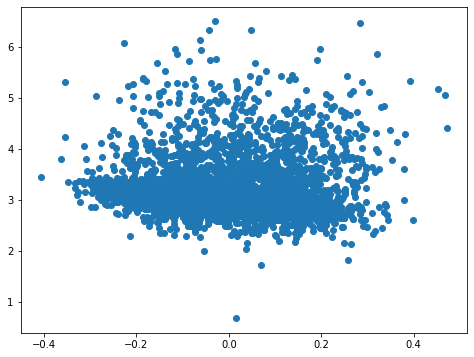

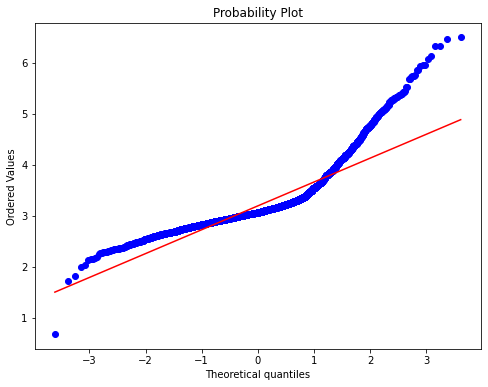

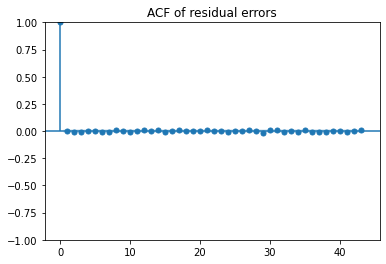

In [ ]:
pred = res.predict(X_val_reduced)

pred_val = pred.copy()
true_val = y_val_log.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_ = ax.scatter(pred_val, residual)

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

plot_acf(res.resid, title='ACF of residual errors')
plt.show()

# Lasso regression

In [ ]:
# Lasso regression for feature selection.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse 

lasso = make_pipeline(StandardScaler(), Lasso())
model = lasso.fit(X_train_train,y_train_train)
pred = model.predict(X_val)

print('rmse is', np.sqrt(mse(y_val, pred)))    

rmse is 36.78944663358472


In [ ]:
# Features that appear lasso regression.

list(zip(X_train_train.columns, lasso[-1].coef_))

[('MONTH', 0.5228563114377575),
 ('DAY_OF_MONTH', -0.10347624188688871),
 ('DAY_OF_WEEK', 0.0),
 ('CRS_ELAPSED_TIME', -0.0),
 ('DISTANCE', -0.0),
 ('CRS_DEP_M', 2.205614692712807),
 ('CRS_ARR_M', 0.0),
 ('Temperature', -0.38364238109413695),
 ('Dew Point', 0.0),
 ('Humidity', -0.0),
 ('Wind Speed', 0.9665745824117877),
 ('Wind Gust', 0.0),
 ('Pressure', -0.6823294592268586),
 ('sch_dep', -0.44514795135858937),
 ('sch_arr', -0.07486211414275079),
 ('9E', -0.0),
 ('AA', -0.0),
 ('AS', 0.0),
 ('B6', 0.0),
 ('DL', 0.0),
 ('HA', -0.0),
 ('MQ', -0.0),
 ('OO', 0.0),
 ('YX', -0.0),
 ('ABQ', -0.0),
 ('ATL', 0.0),
 ('AUS', -0.0),
 ('BNA', -0.0),
 ('BOS', 0.0),
 ('BQN', -0.0),
 ('BTV', 0.0),
 ('BUF', 0.0),
 ('BUR', 0.0),
 ('BWI', 0.0),
 ('CHS', -0.0),
 ('CLE', -0.0),
 ('CLT', -0.0),
 ('CMH', -0.0),
 ('CVG', -0.0),
 ('DCA', 0.0),
 ('DEN', 0.0),
 ('DFW', 0.0),
 ('DTW', -0.0),
 ('EGE', 0.0),
 ('FLL', 0.0),
 ('HNL', -0.0),
 ('IAD', -0.0),
 ('IAH', 0.0),
 ('IND', -0.0),
 ('JAC', 0.0),
 ('JAX', 0.0),
 

In [ ]:
# Tuning hyperparameter alpha for lasso regression.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lasso = Lasso()

pipe = Pipeline(steps=[("scaler", scaler), ("lasso", lasso)])


# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = { 
    'lasso__alpha': [0.05,0.1,0.2,0.5,1,2,5,10]
}
grid_cv = GridSearchCV(pipe, 
                       param_grid,
                       cv=5)
grid_cv.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid_cv.best_score_)
print(grid_cv.best_params_)


Best parameter (CV score=0.037):
{'lasso__alpha': 0.2}


In [ ]:
grid_cv.cv_results_

{'mean_fit_time': array([0.3762218 , 0.22274241, 0.2026052 , 0.1775177 , 0.12656002,
        0.13687782, 0.14641595, 0.17711191]),
 'std_fit_time': array([0.09560845, 0.02136985, 0.02797621, 0.00944855, 0.00864531,
        0.01776144, 0.01536967, 0.00511157]),
 'mean_score_time': array([0.01201425, 0.01088328, 0.01150908, 0.0124732 , 0.009796  ,
        0.0119916 , 0.01596675, 0.022472  ]),
 'std_score_time': array([0.00272622, 0.00175441, 0.00178441, 0.00184402, 0.00171548,
        0.00243744, 0.00609563, 0.00546773]),
 'param_lasso__alpha': masked_array(data=[0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'lasso__alpha': 0.05},
  {'lasso__alpha': 0.1},
  {'lasso__alpha': 0.2},
  {'lasso__alpha': 0.5},
  {'lasso__alpha': 1},
  {'lasso__alpha': 2},
  {'lasso__alpha': 5},
  {'lasso__alpha': 10}],
 'split0_test_score': array([ 4.75206733e-02,  4.83022309e-02, 

In [ ]:
# Checking this value of alpha on the validation set.

lasso = Lasso(alpha=0.2)

pipe = Pipeline(steps=[("scaler", scaler), ("lasso", lasso)])

pipe.fit(X_train_train,y_train_train)
pred = pipe.predict(X_val)

print('rmse is', np.sqrt(mse(pred, y_val)))

rmse is 36.49230975422848


In [ ]:
# Fine-tune alpha.

scaler = StandardScaler()

lasso = Lasso()

pipe = Pipeline(steps=[("scaler", scaler), ("lasso", lasso)])


# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = { 
    'lasso__alpha': np.arange(0.15,0.25,0.01)
}
grid_cv = GridSearchCV(pipe, 
                       param_grid,
                       cv=5)
grid_cv.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid_cv.best_score_)
print(grid_cv.best_params_)


Best parameter (CV score=0.037):
{'lasso__alpha': 0.17}


In [ ]:
# Checking best value of alpha on validation set.

lasso = Lasso(alpha=0.17)

pipe = Pipeline(steps=[("scaler", scaler), ("lasso", lasso)])

pipe.fit(X_train_train,y_train_train)
pred = pipe.predict(X_val)

print('rmse is', np.sqrt(mse(pred, y_val)))

rmse is 36.477436143576575


In [ ]:
# Features that appear in lasso regression with coefficients.

list(zip(X_train_train.columns, pipe[-1].coef_))

[('MONTH', 1.3476412119980834),
 ('DAY_OF_MONTH', -1.0289719198988265),
 ('DAY_OF_WEEK', 0.031082537300280946),
 ('CRS_ELAPSED_TIME', -0.0),
 ('DISTANCE', -0.661566149457414),
 ('CRS_DEP_M', 3.9915722215626164),
 ('CRS_ARR_M', 0.3001405585121599),
 ('Temperature', -3.138858480877146),
 ('Dew Point', 1.6117249559797895),
 ('Humidity', -0.21764670102308645),
 ('Wind Speed', 1.749463589288401),
 ('Wind Gust', -0.0),
 ('Pressure', -1.2403302281115416),
 ('sch_dep', -1.139337912541492),
 ('sch_arr', -1.7183723514396163),
 ('9E', -0.7562447451743092),
 ('AA', -0.0),
 ('AS', 0.21256922240144757),
 ('B6', 0.27961022569564975),
 ('DL', 0.0),
 ('HA', -0.0),
 ('MQ', -0.4146125938976325),
 ('OO', -0.0),
 ('YX', -0.3991001303042731),
 ('ABQ', -0.05261461047736391),
 ('ATL', 0.10201235963573355),
 ('AUS', -0.05133351687399296),
 ('BNA', -0.0),
 ('BOS', 0.1815556779517622),
 ('BQN', -0.31514030602109094),
 ('BTV', 0.09891127956022257),
 ('BUF', -0.0),
 ('BUR', 0.08102540461120122),
 ('BWI', 0.3101378

In [ ]:
# Features that appear in lasso regression with nonzero coefficients.

print(pipe.feature_names_in_)

print(len(pipe.feature_names_in_))

['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'CRS_ELAPSED_TIME' 'DISTANCE'
 'CRS_DEP_M' 'CRS_ARR_M' 'Temperature' 'Dew Point' 'Humidity' 'Wind Speed'
 'Wind Gust' 'Pressure' 'sch_dep' 'sch_arr' '9E' 'AA' 'AS' 'B6' 'DL' 'HA'
 'MQ' 'OO' 'YX' 'ABQ' 'ATL' 'AUS' 'BNA' 'BOS' 'BQN' 'BTV' 'BUF' 'BUR'
 'BWI' 'CHS' 'CLE' 'CLT' 'CMH' 'CVG' 'DCA' 'DEN' 'DFW' 'DTW' 'EGE' 'FLL'
 'HNL' 'IAD' 'IAH' 'IND' 'JAC' 'JAX' 'LAS' 'LAX' 'LGB' 'MCO' 'MIA' 'MSP'
 'MSY' 'OAK' 'ONT' 'ORD' 'ORF' 'ORH' 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'PSE'
 'PSP' 'PWM' 'RDU' 'RIC' 'RNO' 'ROC' 'RSW' 'SAN' 'SAT' 'SAV' 'SEA' 'SFO'
 'SJC' 'SJU' 'SLC' 'SMF' 'SRQ' 'STT' 'SYR' 'TPA' 'CALM' 'E' 'ENE' 'ESE'
 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'VAR' 'W' 'WNW' 'WSW'
 'Cloudy' 'Cloudy / Windy' 'Drizzle and Fog' 'Fair' 'Fair / Windy' 'Fog'
 'Fog / Windy' 'Heavy Rain' 'Heavy Rain / Windy' 'Light Drizzle'
 'Light Drizzle / Windy' 'Light Freezing Rain' 'Light Rain'
 'Light Rain / Windy' 'Light Snow' 'Light Snow / Windy' 'Mostly Cloudy'
 'Mo

In [ ]:
# Checking best value of alpha on test set.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse 

lasso = Lasso(alpha=0.17)

scaler = StandardScaler()

pipe = Pipeline(steps=[("scaler", scaler), ("lasso", lasso)])

pipe.fit(X_train_train,y_train_train)
pred = pipe.predict(X_test)

print('rmse is', np.sqrt(mse(pred, y_test)))

rmse is 35.47815838631771
